In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.options.display.max_columns = None

In [7]:
dataset_base = pd.read_csv("C:/Users/home1/Downloads/aidev/Lesson06_Regression-Model/baseball_salary_preprocessed.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [8]:
import os
os.getcwd()

'c:\\Users\\home1\\Downloads\\aidev\\00_orientation'

In [9]:
os.chdir("C:/Users/home1/Downloads/aidev/Lesson06_Regression-Model")

In [10]:
dataset_base = pd.read_csv("./baseball_salary_preprocessed.csv")
dataset_base.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [11]:
# 列の抜き出し
dataset = dataset_base[['推定年俸', '打点', '年数', '打率', '本塁打', '球団勝率']]

# 列名をリネームする
dataset = dataset.rename(columns={'推定年俸': 'salary', '打点': 'points', \
    '年数': 'years_exp', '打率': 'batting', '本塁打': 'homerun', '球団勝率': 'team_win'})
dataset.head()

,salary,points,years_exp,batting,homerun,team_win
0,21000,92,11,0.308,23,0.633
1,19000,56,7,0.271,14,0.633
2,14000,60,5,0.290,8,0.633
3,11500,78,7,0.265,27,0.633
4,11000,48,20,0.292,9,0.633


<Axes: xlabel='points', ylabel='salary'>

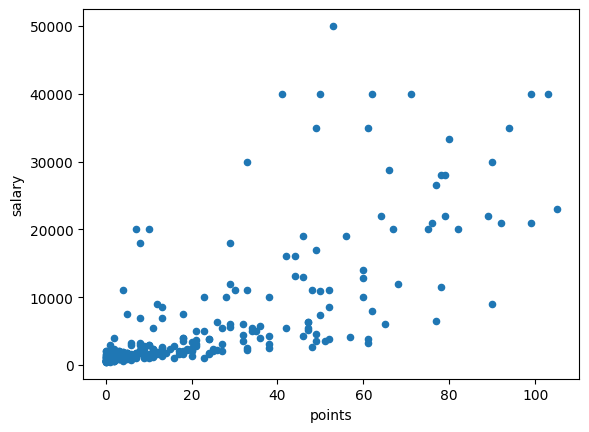

In [12]:
# 打点と推定年俸の散布図
dataset.plot(kind='scatter', x='points', y='salary')

In [13]:
# 必要なライブラリの追加読み込み
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
Y = np.array(dataset['salary'])
X = np.array(dataset[['points']])

In [15]:
print("Y=", Y.shape, ", X=", X.shape)

Y= (241,) , X= (241, 1)


In [16]:
# XとYを機械学習用データ（train）とテストデータ（test）に7:3に分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Trainをさらに学習データ（train）と検証データ（valid）に7:3に分ける
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [17]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (117,) , X_train= (117, 1)
Y_valid= (51,) , X_valid= (51, 1)
Y_test= (73,) , X_test= (73, 1)


In [18]:
# 線形回帰モデルの指定
linear_model = LinearRegression()

# fit()で学習を実施する
linear_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
# predict()で予測を実施する
Y_pred = linear_model.predict(X_valid)

In [20]:
# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

[1140 5400 5700 1650 3100]
[ 470.34255761 8918.81501551 9415.78398362 2955.18739817 5688.51672278]


In [21]:
# MSE（平均二乗誤差）を算出
linear_model_mse = mean_squared_error(Y_valid, Y_pred)
print('MSE(1変数の線形回帰モデル):', linear_model_mse)

MSE(1変数の線形回帰モデル): 66838239.72825806


In [22]:
# interceptは切片という意味
p0 = linear_model.intercept_

# coefは係数という意味
p1 = linear_model.coef_[0]

print("p0:", p0, ", p1:", p1)

p0: 470.3425576073523 , p1: 248.484484056025


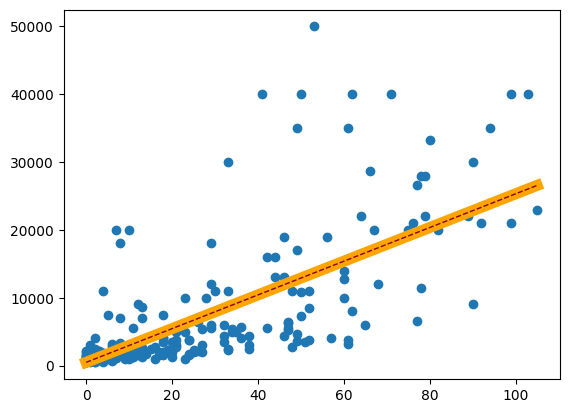

In [23]:
# パラメータを使った1次関数
def calc(x):
    return p0 + p1 * x

# 打点（X）の最小値～最大値の範囲で値を100個作成してリストに格納する
X_simu = np.linspace(X.min(), X.max(), 100)

# パラメータを使った1次関数による値
Y_simu = calc(X_simu)

# 線形回帰モデルによる予測値
Y_prd2 = linear_model.predict(X_simu.reshape(-1,1))

# １次関数：赤い点線、予測値：オレンジ、実際の値：青い散布図
plt.plot(X_simu, Y_prd2, color='orange', linewidth=8)
plt.plot(X_simu, Y_simu, color='darkred', linewidth=1, linestyle='dashed')
plt.scatter(X, Y)